## Задание:

#### Реализовать и обучить (с нуля) СНС для задачи классификации изображений на датасете CIFAR-10

In [163]:
%tensorflow_version 2.x

In [164]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf

In [165]:
(train_x, train_y), (test_x, test_y)=tf.keras.datasets.cifar10.load_data()

In [166]:
train_x = train_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.
test_x = test_x.reshape(-1, 32, 32, 3).astype(np.float32) / 255.

print(train_x.shape, train_x.dtype)
print(test_x.shape, test_x.dtype)
print(train_y.shape, train_y.dtype)
print(test_y.shape, test_y.dtype)

(50000, 32, 32, 3) float32
(10000, 32, 32, 3) float32
(50000, 1) uint8
(10000, 1) uint8


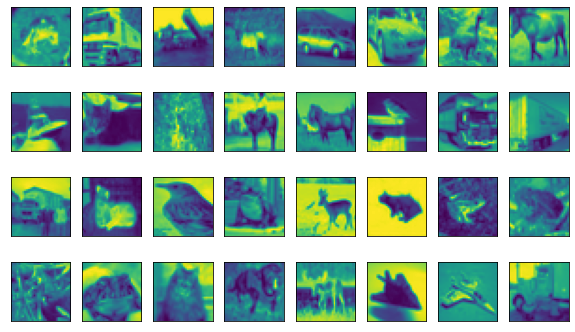

In [167]:
some_samples = train_x[:32, ...]

fig = plt.figure(figsize=(10, 6))
for j in range(some_samples.shape[0]):
    ax = fig.add_subplot(4, 8, j+1)
    ax.imshow(some_samples[j,:,:,0])
    plt.xticks([]), plt.yticks([])
plt.show()

In [168]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2), (2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [169]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [170]:
NUM_EPOCHS = 50

model.fit(train_x, train_y, epochs=NUM_EPOCHS)

Epoch 1/50
1563/1563 [==============================] - 7s 5ms/step - loss: 2.2127 - accuracy: 0.1727
Epoch 2/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8534 - accuracy: 0.3252
Epoch 3/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5817 - accuracy: 0.4239
Epoch 4/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4341 - accuracy: 0.4799
Epoch 5/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3320 - accuracy: 0.5190
Epoch 6/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.2345 - accuracy: 0.5590
Epoch 7/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1416 - accuracy: 0.5957
Epoch 8/50
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0602 - accuracy: 0.6248
Epoch 9/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9874 - accuracy: 0.6516
Epoch 10/50
1563/1563 [==============================] - 7s 4ms/step - loss: 0.924

In [171]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 2.1969 - accuracy: 0.7206


[2.196861505508423, 0.7206000089645386]

In [172]:
sample = test_x[0, ...]
prediction = model(sample[None, ...])[0]
print(prediction)

tf.Tensor(
[8.8018141e-11 6.5921270e-04 7.5143555e-12 9.9281090e-01 1.1370588e-08
 6.5292376e-03 8.9626964e-09 3.3512300e-09 1.2367218e-07 4.7872851e-07], shape=(10,), dtype=float32)


In [173]:
def test_digit(sample):
    
    labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
    prediction = model(sample[None, ...])[0]
    ans = np.argmax(prediction)
    
    fig = plt.figure(figsize=(12,4))

    ax = fig.add_subplot(1, 2, 1)
    ax.imshow(sample[:,:,0])
    plt.xticks([]), plt.yticks([])

    ax = fig.add_subplot(1, 2, 2)
    bar_list = ax.bar(np.arange(10), prediction, align='center')
    #bar_list[ans].set_color()
    ax.set_xticks(np.arange(10))
    ax.set_xlim([-1, 10])
    ax.grid(True)

    plt.show()
    
    print('Predicted number: {}'.format(labels[ans]))

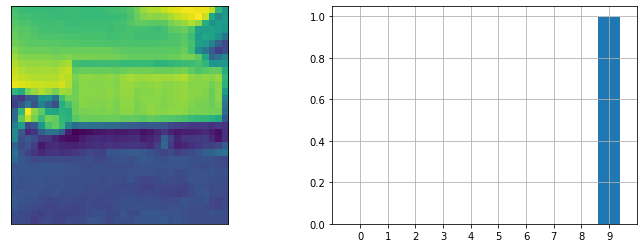

Predicted number: Truck


In [182]:
import random

idx = random.randint(0, test_x.shape[0])
sample = test_x[idx, ...]
test_digit(sample)

# Новый раздел

# Новый раздел

# Новый раздел

# Новый раздел